# Roboworld

In diesem Notebook lassen navigieren wir einen fiktiven Roboter durch eine (Gitter-)Welt.
Schwerpunkt dieser Übung ist es die [4 Techniken des *Computational Thinkings*](https://bzoennchen.github.io/ct-book/chapters/01-2/what-is-ct.html)

1. **Abstraktion nutzen**
2. **Dekomposition**
3. **Muster erkennen**
4. **Algorithmen entwerfen**

spielerische zu erlernen.

Bezüglich der Programmiermittel benötigen Sie: Die [Grundlagen](https://bzoennchen.github.io/ct-book/chapters/03-3/intro.html), Kontrollstrukturen ([Schleifen](https://bzoennchen.github.io/ct-book/chapters/03-7/2-loops.html), [Fallunterscheidungen](https://bzoennchen.github.io/ct-book/chapters/03-7/1-cases.html#sec-cases)), [Funktionen](https://bzoennchen.github.io/ct-book/chapters/03-6/intro.html), die Nutzung eines fremden Pakets ``roboworld`` (Funktionsaufrufe, Lesen und Verstehen der Doku).

Sie benötigen folgende Pakete, welche auf dem Datahub bereits vorinstalliert sind.

+ ``otter-grader``
+ ``roboworld``

Wenn dies notwendig ist, installieren Sie diese mit:

```
conda install [paketname]
```

oder

```
pip install [paketname]
```

In [389]:
import otter
grader = otter.Notebook('CT-Roboworld.ipynb')

## 1. Einleitung

Roboter dienen uns heute in vielen Bereichen als Helfer und Assistenten.
Sie fertigen Autos und andere große Maschinen an, spielen gegeneinander Fußball und interagieren mit uns Menschen auf direktem Weg.
Roboter können dort eingesetzt werden, wo es für den Menschen zu gefährlich wird.
Zum Beispiel, hatte man versucht durch einen Roboter die Lage am Kernreaktor von Chernobyl besser zu analysieren.
Ein weiteres Beispiel ist die Entschärfung von Sprengstoff oder das Auffinden von Überlebenden, welche unter Gebäuden begraben wurden.

Wir werden heute einen Roboter durch eine zweidimensionale Welt bewegen.
Um die Welt und ihren Roboter anzuzeigen benötigen Sie das Modul ``roboworld``.

In [345]:
import roboworld as rw
import random as rnd

Dieser Befehl sorgt dafür, dass das *Modul* ``roboworld`` in unser Notebook importiert (eingefügt) wird. Um nicht immer den langen Namen ``roboworld`` tippen zu müssen, wählen wir die Abkürzung ``rw``. 

Lassen Sie uns eine Roboterwelt mit 5 Zeilen ``nrows`` und 9 Spalten ``ncols`` erzeugen:

In [346]:
world = rw.new_world(nrows = 5, ncols = 9)

Der Befehl 

```python
rw.new_world(nrows = 5, ncols = 9)
``` 

erzeugt eine Robowelt mit ``nrows`` Zeilen und ``ncols`` Spalten, indem wir die *Funktion* ``new_world`` des Pakets ``rowobworld``, was wir mit einem Alias names ``rw`` versehen haben, aufrufen. Mit der *Zuweisung*

```python
world = rw.new_world(nrows = 5, ncols = 9)
```

weisen wir diese Welt der *Variablen* ``world`` (rechter Teil) zu.
Wir können unsere Welt auch ausgeben.

In [347]:
print(world)

---------
---------
----N----
---------
-------G-


oder anzeigen:

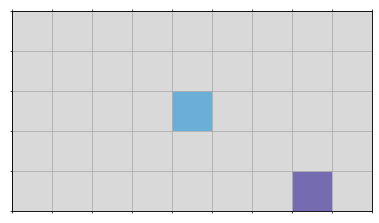

In [348]:
world.show()

***
***Aufgabe 1 (Dokumentation lesen).*** 

Lesen Sie sich in der [Dokumentation](https://robo-world-doc.readthedocs.io/en/latest/index.html) des Pakets ``roboworld`` den Abschnitt **[The roboworld Universe](https://robo-world-doc.readthedocs.io/en/latest/roboworld.html)** durch um sich klar zu machen wie die Welt des Roboters aussieht und was der Roboter für eine Funktionalität besitzt.
Für das Notebook werden Sie womöglich immer wieder auf die Dokumentation zurückgreifen müssen.

***Aufgabe 2 (Robowelt erzeugen).*** 

Erzeugen Sie eine Welt ``world`` mit einer Zeile und zehn Spalten.

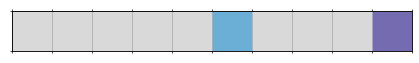

In [393]:
simple_corridor = rw.new_world(nrows = 1, ncols = 10) # SOLUTION
simple_corridor.show()

In [ ]:
grader.check("q2")

Soweit so gut. Wir haben also eine Welt ``world`` und in dieser befindet sich unser Roboter.
Wie können wir unseren Roboter nun steuern?
Wir müssen der Welt sagen, sie solle uns doch bitte den Roboter geben.

Wir können daraufhin mit ``help(robo)`` herausfinden was der Roboter denn so kann.

In [351]:
robo = world.get_robo()
help(robo)

Help on RoboProxy in module roboworld.world object:

class RoboProxy(builtins.object)
 |  RoboProxy(robo: roboworld.world.Robo)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, robo: roboworld.world.Robo)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> str
 |      Returns a str-representation of the roboter.
 |  
 |  disable_print(self) -> None
 |      Deactivates the printing of executed Robo-instructions
 |  
 |  enable_print(self) -> None
 |      Activates the printing of executed Robo-instructions.
 |  
 |  is_at_goal(self) -> bool
 |      Returns True if and only if robo is standing at the goal.
 |      
 |      :return: True if and only if robo is standing at the goal.
 |      :rtype: bool
 |  
 |  is_carrying_leafs(self) -> bool
 |      Returns True if and only if thre the robo carries any leafs.
 |      
 |      :return: True if and only if thre the robo carries any leafs.
 |      :rtype: bool
 |  
 |  is_carrying_stone(se

***
***Aufgabe 3 (Roboter bewegen I).*** 

Testen Sie was die Methode ``move`` des Roboters tut, rufen Sie sie dazu mit ``robo.move()`` auf.
Lassen Sie sich davor und danach die Welt anzeigen oder ausgeben.

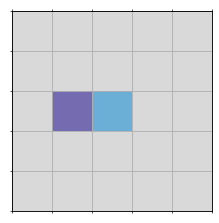

In [352]:
world = rw.new_world(nrows = 5, ncols = 5)
robo = world.get_robo()
world.show()

move (2, 2) -> (3, 2)


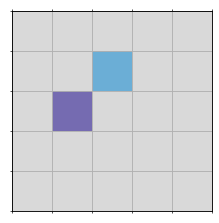

In [353]:
robo.move() # SOLUTION
world.show()

***Aufgabe 4 (Roboter bewegen II).*** 

Bewegen Sie Ihren Roboter ``robo`` (blau) auf das Ziel (lila) in Ihrer Welt ``corridor``.
Gehen Sie davon aus, dass der Roboter bzw. Sie wissen wo das Ziel ist.
Nach der Erstellung der Welt ist der Roboter nach **Norden** ausgerichtet.

**Hinweis:** Mit der Funktion ``animate(world)`` des Pakets ``roboworld``, können Sie sich eine Animation Ihrer Lösung ansehen.

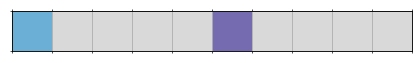

In [354]:
corridor = rw.new_world(nrows = 1, ncols = 10, robo_position=[0,0], goal_position=[0, 5])
corridor.show()

In [355]:
corridor = rw.new_world(nrows = 1, ncols = 10, robo_position=[0,0], goal_position=[0, 5])
robo = corridor.get_robo()

# BEGIN SOLUTION
robo.turn_left()
robo.turn_left()
robo.turn_left()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()
# END SOLUTION

rw.animate(corridor)

turn N -> W
turn W -> S
turn S -> E
move (0, 0) -> (0, 1)
move (0, 1) -> (0, 2)
move (0, 2) -> (0, 3)
move (0, 3) -> (0, 4)
move (0, 4) -> (0, 5)


In [ ]:
grader.check("q4")

***Aufgabe 5 (Blätter aufheben).*** 

Bewegen Sie Ihren Roboter ``robo`` (blau) auf das Ziel (lila) in Ihrer Welt ``leaf_corridor``.
Heben Sie dabei alle Blätter (grün) auf!
``robo`` kann unendlich viele Blätter tragen und diese aufnehmen bzw. ablegen wenn er auf einem Blatt (grün) drauf steht.
``robo`` ist noch **Osten** ausgerichtet.

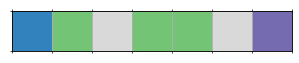

In [357]:
leaf_corridor = rw.leaf_corridor()
leaf_corridor.show()

In [358]:
leaf_corridor = rw.leaf_corridor()
robo = leaf_corridor.get_robo()

# BEGIN SOLUTION
robo.move()
robo.take_leaf()
robo.move()
robo.move()
robo.take_leaf()
robo.move()
robo.take_leaf()
robo.move()
robo.move()
# END SOLUTION

rw.animate(leaf_corridor)

move (0, 0) -> (0, 1)
take leaf at (0, 1)
move (0, 1) -> (0, 2)
move (0, 2) -> (0, 3)
take leaf at (0, 3)
move (0, 3) -> (0, 4)
take leaf at (0, 4)
move (0, 4) -> (0, 5)
move (0, 5) -> (0, 6)


In [ ]:
grader.check("q5")

***Aufgabe 6 (Roboter nach rechts drehen).***

Definieren Sie eine Funktion ``turn_right(robo)`` mit dem Argument ``robo`` was Ihr Roboter ist.

In [360]:
def turn_right(robo):
    # BEGIN SOLUTION
    robo.turn_left()
    robo.turn_left()
    robo.turn_left()
    # END SOLUTION

In [ ]:
grader.check("q6")

***Aufgabe 7 (Steiniger Korridor).*** 

Schreiben Sie eine Funktion ``walk_stony_corridor(robo)`` die ``robo`` (blau) auf das Ziel (lila) in seiner Welt ``stone_corridor`` bewegt.
Sie müssen dabei die Steine (orange) aus dem Weg räumen.
``robo`` kann nur einen Stein tragen und kann diesen nur vor sich aufheben bzw. ablegen.
Sie **müssen** davon ausgehen, dass sie nicht wissen:

+ wie viel Steine es auf dem Korridor gibt,
+ wo sich diese Steine befinden,
+ und wie lang ihr Korridor ist

``robo`` ist noch **Osten** ausgerichtet und der Lauf bis zum Ziel (lila) ist möglich. Das Ziel befindet sich am Ende des Korridors.

**Tipp:** Schauen Sie in die [Doku](https://robo-world-doc.readthedocs.io/en/latest/roboworld.html#robo) von ``roboworld`` um die richtigen Funktionen von ``robo`` zu finden.

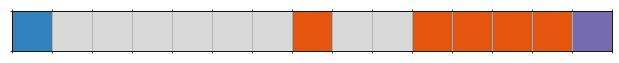

In [362]:
# Example stony corridor
stone_corridor = rw.corridor(length=rnd.randint(10,15), random_headway=False, nstones=rnd.randint(3,5))
stone_corridor.show()

In [363]:
stone_corridor = rw.corridor(length=rnd.randint(10,15), random_headway=False, nstones=rnd.randint(3,5))
robo = stone_corridor.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#stone_corridor.disable_animation() # use this to disable the animation of the world (speeds up computation)

def walk_stony_corridor(robo):
    # BEGIN SOLUTION
    robo.disable_print()
    while not robo.is_wall_in_front():
        if robo.is_stone_in_front():
            robo.take_stone_in_front()
            robo.turn_left()
            robo.turn_left()
            robo.put_stone_in_front()
            robo.turn_left()
            robo.turn_left()
        robo.move()
    robo.enable_print()
    # END SOLUTION

walk_stony_corridor(robo)
rw.animate(stone_corridor)

In [ ]:
grader.check("q7")

***Aufgabe 8 (Slalomrunner).***

Schreiben Sie eine Funktion ``walk_maze(robo)``, die ``robo`` durch das Labyrinth ``rw.maze()`` bewegt. Verwenden Sie 

+ ``robo.turn_left()``, 
+ ``robo.move()``
+ ``robo.is_wall_in_front()``
+ und Ihre Funktion ``turn_right(robo)``.
  
Ihr Roboter ist nach Norden ausgerichtet.
Verwenden Sie geeignete Kontrollstrukturen.

**Hinweis:** Sie können die Ausgabe mit ``robo.disable_print()`` deaktivieren.

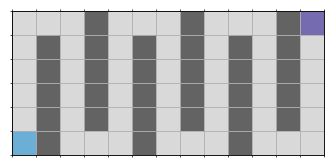

In [367]:
maze = rw.maze()
maze.show(scale=0.3)

In [368]:
maze = rw.maze()
robo = maze.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#maze.disable_animation() # use this to disable the animation of the world (speeds up computation)

def walk_maze(robo):
    # BEGIN SOLUTION
    robo.disable_print()
    count = 0
    while(not robo.is_at_goal()):
        while (not robo.is_wall_in_front()):
            robo.move()
        if count < 2:  
            turn_right(robo)
            count += 1
        else:
            robo.turn_left()
            count += 1
        count = count % 4
    robo.enable_print()
    # END SOLUTION
    
walk_maze(robo)
rw.animate(maze)

In [ ]:
grader.check("q8")

***Aufgabe 9 (Rundreise).***

Schreiben Sie eine Funktion ``walk_roundtrip(robo)``, die ``robo`` durch den Rundgang ``rw.round_trip()`` bewegt.
``robo`` soll dabei alle Blätter auf dem Weg aufheben.
Verwenden Sie Schleifen um das das Problem zu lösen.
Gehen Sie vielleicht sogar davon aus, dass Sie nicht genau wissen wie der Rundgang aussieht (bis auf, dass er eine Zelle breit ist).

Ihr Roboter ist nach **Osten** ausgerichtet.
Verwenden Sie geeignete Kontrollstrukturen.

**Hinweis:** Sie können die Ausgabe mit ``robo.disable_print()`` deaktivieren. Wahrscheinlich laufen Sie Gefahr in eine Endlosschleife zu programmieren, indem Sie ``robo`` vor und zurück bewegen. Wie vermeiden Sie das?

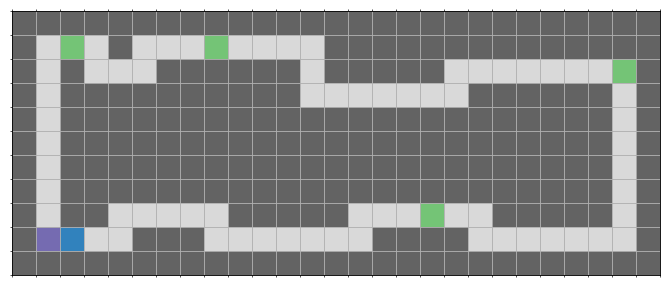

In [370]:
round_trip = rw.round_trip()
round_trip.show(scale = 0.3)

In [371]:
round_trip = rw.round_trip()
robo = round_trip.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#round_trip.disable_animation() # use this to disable the animation of the world (speeds up computation)

def walk_roundtrip(robo):
    # BEGIN SOLUTION
    robo.disable_print()
    def turn_to_hole(robo):
        turns = 0
        while robo.is_wall_in_front() or turns % 2 == 0:
            turns += 1
            robo.turn_left()
    
    while not robo.is_at_goal():
        if robo.is_wall_in_front():
            turn_to_hole(robo)
        elif robo.is_leaf_in_front():
            robo.move()
            robo.take_leaf()
        else:
            robo.move()
        
    robo.enable_print()
    # END SOLUTION
    
walk_roundtrip(robo)
rw.animate(round_trip)

In [ ]:
grader.check("q9")

## Sortieren von Blättern

Betrachten Sie folgende Welt:

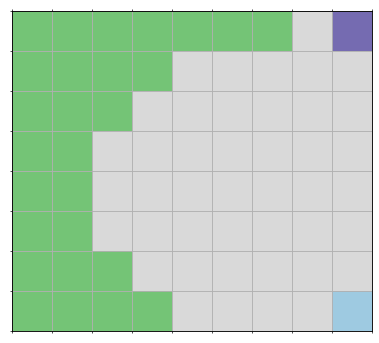

In [373]:
n = 8
sorting_world = rw.sorting(n=n)
sorting_world.show()

Die Welt besteht aus $n$ Zeilen und jede dieser Zeilen **repräsentiert** eine Zahl zwischen $1$ und $n-1$, welche gleich der Anzahl der Blätter ist.
Die Blätter beginnen immer ganz im **Westen** und es gibt keine Lücke zwischen den Blättern.
Zahlen können doppelt vorkommen.
``robo`` soll nun die Zeilen/Blätter sortieren!
Dabei ganz im **Norden** die größte und ganz im **Süden** die kleinste Zahl stehen.

![Robo und BubbleSort](./figs/bubblesort.gif)

Wir werden diese schwierige Aufgabe in **Teilprobleme zerlegen**, **Abstraktion nutzen** und sich wiederholende **Muster erkennen** und dabei **Algorithmen entwickeln** die unsere Teilprobleme lösen.

***Aufgabe 10.1 (Blätter zählen).***

Schreiben Sie eine Funktion ``count_leafs(robo)``, welche die Anzahl der Blätter der Zeile in der sich ``robo`` ganz im **Osten** und nach **Westen** ausgerichtet befindet, zurückliefert doch sonst nichts verändert.
Sie müssen dafür ``robo`` bewegen doch am Ende sollte sich die Welt nicht verändert haben (**Invarianz**), d.h. alle Blätter liegen dort wo sie waren und ``robo`` steht wieder ganz im **Osten** nach **Westen** ausgerichtet.

In [374]:
n = 8
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def count_leafs(robo):
    nleafs = 0
    # BEGIN SOLUTION
    robo.disable_print()
    # count
    while not robo.is_wall_in_front():
        if robo.is_leaf_in_front():
            nleafs += 1
        robo.move()
    # move back
    robo.turn_left()
    robo.turn_left()
    while not robo.is_wall_in_front():
        robo.move()
    robo.turn_left()
    robo.turn_left()
    robo.enable_print()
    # END SOLUTION
    return nleafs
    
print(count_leafs(robo))
robo.move()
print(robo.position)
rw.animate(sorting_world)

8
move (0, 8) -> (0, 7)
(0, 7)


In [ ]:
grader.check("q10")

***Aufgabe 10.2 (Zeilen wechseln).***

Schreiben Sie eine Funktion ``move_from_to(robo, src, dest)``, welche ``robo`` von Zeile ``src`` (unterste Zeile ist gleich Zeile 0) nach Zeile ``dest`` bewegt.
Gehen Sie davon aus, dass ``robo`` nach **Westen** ausgerichtet ist und sich in Zeile ``src`` befindet und das Zeile ``src`` und ``dest`` existieren.
So soll er am Ende auch in Zeile ``dest`` ausgerichtet sein!

In [376]:
n = 8
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def move_from_to(robo, src, dest):
    # BEGIN SOLUTION
    robo.disable_print()
    if src == dest:
        return
    
    if src > dest:
        robo.turn_left()
        for _ in range(src-dest):
            robo.move()
        turn_right(robo)
    else:
        turn_right(robo)
        for _ in range(dest-src):
            robo.move()
        robo.turn_left()
    robo.enable_print()
    # END SOLUTION

move_from_to(robo, 0, n//2)
rw.animate(sorting_world)

In [ ]:
grader.check("q11")

***Aufgabe 10.3 (Blätter entfernen).***

Schreiben Sie eine Funktion ``remove_leafs(robo, n)``, welche ``robo`` genau ``n`` Blätter (von Osten nach Westen) in der aktuelle Zeile aufnehmen lässt.
Gehen Sie davon aus, dass ``robo`` nach **Westen** ausgerichtet ist und sich mindestens ``n`` Blätter in der Zeile befinden.
``robo`` soll nach der Operation wieder genauso dastehen wie zuvor!

In [378]:
n = 8
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def remove_leafs(robo, n):
    # BEGIN SOLUTION
    robo.disable_print()
    
    if n <= 0:
        return
    
    start = False   # mark which indicates that robo found the first leaf
    k = 0           # number of leafs robo already took up
    
    while not robo.is_wall_in_front():
        if robo.is_leaf_in_front():
            start = True
        robo.move()
        if start and k < n:
            robo.take_leaf()
            k += 1
            
    robo.turn_left()
    robo.turn_left()
    while not robo.is_wall_in_front():
        robo.move()
    robo.turn_left()
    robo.turn_left() 
    
    robo.enable_print()
    # END SOLUTION
    
nleafs = count_leafs(robo)
remove_leafs(robo, nleafs-1)
rw.animate(sorting_world)

In [ ]:
grader.check("q12")

***Aufgabe 10.4 (Blätter hinzufügen).***

Schreiben Sie eine Funktion ``add_leafs(robo, n)``, welche genau das Gegenteil von ``remove_leafs(robo, n)`` bewirkt.
Gehen Sie davon aus, dass ``robo`` mindestens ``n`` Blätter bei sich hat und das genug Platz für die ``n`` Blätter ist.

In [380]:
n = 8
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def add_leafs(robo, n):
    # BEGIN SOLUTION
    robo.disable_print()
    
    if n <= 0:
        return
    
    start = False     # mark which indicates that robo found the place to start dropping leaf
    k = 0             # number of leafs robo already dropped
    
    while not start or not robo.is_wall_in_front():
        if robo.is_leaf_in_front() or robo.is_wall_in_front():
            start = True
            robo.turn_left()
            robo.turn_left()
            
        if start and k < n:
            robo.put_leaf()
            k += 1
        robo.move()
            
    robo.turn_left()
    robo.turn_left()
    
    robo.enable_print()
    # END SOLUTION
    
nleafs = count_leafs(robo)
remove_leafs(robo, nleafs-1)
add_leafs(robo, nleafs-1)
rw.animate(sorting_world)

In [ ]:
grader.check("q13")

***Aufgabe 10.5 (Vergleich von Zeilen).***

Was wir für die Sortierung noch brauchen ist eine Vergleichsoperation.
Schreiben Sie eine Funktion ``is_larger(robo, src, dest)``, welche genau dannn ``True`` zurückliefert, wenn in Zeile ``src`` mehr Blätter als in Zeile ``dest`` liegen.
Diese Operation sollte die Welt nicht verändern.

Gehen Sie davon aus, dass ``robo`` in Zeile ``src`` ganz im **Osten** nach **Westen** ausgerichtet steht.


In [382]:
n = 8
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def is_larger(robo, src, dest):
    # BEGIN SOLUTION
    robo.disable_print()
    nleafs_src = count_leafs(robo)
    move_from_to(robo, src, dest)
    nleafs_dest = count_leafs(robo)
    move_from_to(robo, dest, src)
    robo.enable_print()
    return nleafs_src > nleafs_dest
    # END SOLUTION

print(is_larger(robo, 0, 3))
rw.animate(sorting_world)

False


In [ ]:
grader.check("q14")

***Aufgabe 10.6 (Reihe tauschen).***

Sie haben das Problem erfoglreich in kleine Teilprobleme zerlegt und diese gelöst.
Jetzt können wir durch diese gelösten Teilprobleme ein erstes größeres Problem lösen: Das Vertauschen zweier Zeilen.

Schreiben Sie eine Funktion ``swap_row(robo, src, dest)`` welche die Blätter der aktuellen Zeile ``src`` (dort wo ``robo`` steht) mit der Zeile ``dest`` vertauscht.
Gehen Sie davon aus, dass ``robo`` in Zeile ``src`` ganz im **Osten** nach **Westen** ausgerichtet steht.
Nach dieser Operation sollte er genauso wieder dort stehen.

In [384]:
n = 8
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def swap_row(robo, src, dest):
    # BEGIN SOLUTION
    robo.disable_print()
    
    nleafs_src = count_leafs(robo)
    move_from_to(robo, src, dest)
    nleafs_dest = count_leafs(robo)
    
    if nleafs_src > nleafs_dest:
        move_from_to(robo, dest, src)
        remove_leafs(robo, nleafs_src-nleafs_dest)
        move_from_to(robo, src, dest)
        add_leafs(robo, nleafs_src-nleafs_dest)
        move_from_to(robo, dest, src)
    elif nleafs_src < nleafs_dest:
        remove_leafs(robo, nleafs_dest-nleafs_src)
        move_from_to(robo, dest, src)
        add_leafs(robo, nleafs_dest-nleafs_src)
    else:
        move_from_to(robo, dest, src)
        
    robo.enable_print()
    # END SOLUTION

swap_row(robo, 0, 3)
rw.animate(sorting_world)

In [ ]:
grader.check("q15")

***Aufgabe 10.7 (BubbleSort mit Robo).***

Wir haben nun alle Funktionalität die wir benötigen um die Welt aus Blättern durch ``robo`` zu sortieren:

+ ``move_from_to(robo, src, dest)``: ``robo`` bewegt sich von Zeile ``src`` nach Zeile ``dest``. **Repräsentiert Indexierung in einer Liste** ``i = ...``
+ ``count_leafs(robo)``: ``robo`` zählt die Blätter in Zeile seiner Zeile. **Repräsentiert lesenden Zugriff auf ein Litenelement** ``lst[i]``
+ ``is_larger(robo, src, dest)``: Vergleicht die Anzahl der Blätter zweier Zeilen. **Repräsentiert lesenden Zugriff auf ein Litenelement** ``lst[src] > lst[dest]``
+ ``swap_row(robo, src, dest)``: ``robo`` vertauscht Zeile ``dest`` mit Zeile ``src``. **Repräsentiert schreibenden Zugriff auf ein Listenelement** ``lst[src], lst[dest] = lst[dest], lst[src]``

Schreiben Sie eine Funktion ``sort(robo, n)``, welche ``robo`` die Blätterwelt ``sorting_world``, bestehend aus ``n`` Zeilen, sortieren lässt.
Gehen Sie davon aus, dass ``robo`` ganz rechts unten nach **Westen** ausgerichtet steht.
Ganz im **Norden** soll die größte und ganz im **Süden** die kleinste Zahl stehen.
Am Ende sollte ``robo`` wieder dort stehen, wo er zu anfang stand (rechts unten).


**Tipp**: Wir empfehlen Ihnen für die Sortierung den sog. [BubbleSort-Algorithmus](https://de.wikipedia.org/wiki/Bubblesort) zu implementieren.
Das Problem ist nur mit den Funktionen ``is_larger``, ``swap_row`` und ``move_from_to`` und zwei Schleifen lösbar.

**Achtung**: Durch die Erzeugung der Animation und der aufwendigen Bewegungen von ``robo`` wird Ihr Code bereits für kleine Beispiele langsam. Testen Sie kleine Beispiele.


_Type your answer here, replacing this text._

In [386]:
n = 6
sorting_world = rw.sorting(n=n)
robo = sorting_world.get_robo()

#robo.disable_print() # use this to disable the printing of robo's actions
#sorting_world.disable_animation() # use this to disable the animation of the world (speeds up computation)

def sort(robo, n):
    # BEGIN SOLUTION
    
    # Unsere Lösung ist nicht die schnellste, da wir uns nichts merken und ausschließlich 
    # die Funktionen is_larger, swap_row und move_from_to verwenden.
    robo.disable_print()
    for k in range(n,0,-1):
        for i in range(k-1):
            if is_larger(robo, i, i+1):
                swap_row(robo, i, i+1)
            move_from_to(robo, i, i+1)
        move_from_to(robo, k-1, 0)
        
    robo.enable_print()
    
    # END SOLUTION

sort(robo, n)
rw.animate(sorting_world)

Sie können sich aus Ihrer Lösung eine ``GIF``-Animation erstellen:

In [387]:
# This can take a while!
sorting_world.animate().save('./bubblesort.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.


In [ ]:
grader.check("q16")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Dieses Notebook ist zur reinen Übung gedacht und muss nicht abgegeben werden. Wir raten Ihnen eindringlich alle Aufgaben zu lösen!

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)